In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn import decomposition

In [18]:
X1,Y1 = make_blobs(n_features=10, n_samples=100, centers=4, random_state=4, cluster_std=1)
matrix=X1
print(X1.shape)
print(Y1.shape)

(100, 10)
(100,)


In [19]:
df = pd.DataFrame(matrix, index=range(matrix.shape[0]), columns=range(matrix.shape[1]))
df['y'] = Y1
df.rename(columns={
    0:'x1',
    1:'x2',
    2:'x3',
    3:'x4',
    4:'x5',
    5:'x6',
    6:'x7',
    7:'x8',
    8:'x9',
    9:'x10',
}, inplace=True)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-0.082804,9.802603,6.321587,7.283099,-7.020766,-9.397969,1.444042,-6.696570,3.695892,-0.847258,2
1,4.754935,-5.752100,6.648462,10.020271,-5.053426,3.891982,-8.993215,-1.793329,-9.087479,9.544173,1
2,9.169482,1.128930,9.052510,5.191424,2.458724,-6.373607,9.406078,-10.920219,-4.579715,-2.819074,0
3,0.317239,8.475311,-1.141536,-7.707184,-7.304231,-1.319467,2.386655,3.350410,-1.499193,3.148171,3
4,9.143852,1.781174,10.240289,2.455444,3.992124,-5.642282,8.746749,-9.695984,-6.395887,-0.747984,0
...,...,...,...,...,...,...,...,...,...,...,...
95,9.954129,0.734488,9.861745,6.028718,3.605129,-6.911347,10.243763,-9.358835,-4.266551,-0.277714,0
96,3.385594,-3.259495,8.272444,10.026804,-3.946020,1.871413,-8.374345,-2.256114,-9.392443,9.765574,1
97,1.877194,9.030563,-0.307766,-7.598400,-7.233577,-1.295777,0.375085,1.583794,-0.643550,3.387134,3
98,8.292622,-5.956244,7.879948,11.897879,-6.093983,2.701820,-9.992196,-1.793277,-10.166286,9.063513,1


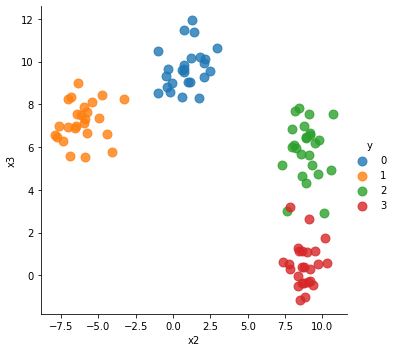

In [21]:
sns.lmplot(
    x='x2',
    y='x3',
    data=df,
    fit_reg=False,
    hue='y',
    legend=True,
    scatter_kws={'s':80}
)

In [23]:
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(X1)
pc.shape

(100, 4)

In [26]:
df = pd.DataFrame({'varianza':pca.explained_variance_ratio_, 'PCA':['PC1', 'PC2', 'PC3', 'PC4']})
df

,varianza,PCA
0,0.445205,PC1
1,0.362620,PC2
2,0.169061,PC3
3,0.005475,PC4


<AxesSubplot:xlabel='PCA', ylabel='varianza'>

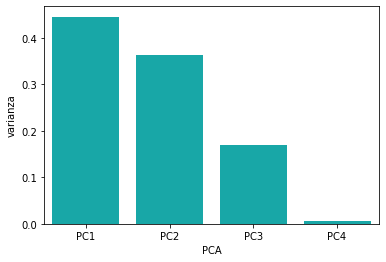

In [29]:
plt.figure()
sns.barplot(x='PCA', y='varianza', data=df, color='c')

In [32]:
pc_df = pd.DataFrame(data=pc, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pc_df['cluster'] = Y1
pc_df

,PC1,PC2,PC3,PC4,cluster
0,-8.658366,-0.126757,10.187379,0.267456,2
1,18.820067,-0.584619,0.968206,-1.907496,1
2,-6.289629,-13.798903,-4.780633,0.577502,0
3,-5.531445,14.612271,-5.646356,1.661696,3
4,-5.248294,-12.363291,-7.784404,-0.747786,0
...,...,...,...,...,...
95,-5.414143,-14.550180,-5.283853,0.772444,0
96,16.590468,-1.188810,1.773031,-3.274902,1
97,-4.920849,13.894600,-4.832818,1.487168,3
98,20.413837,-2.737588,1.488502,-0.250664,1
